<a href="https://colab.research.google.com/github/Leonardo-Lopes-Borem-Peixoto/Cloth_classification/blob/main/Ecommerce_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [42]:
dataset = keras.datasets.fashion_mnist
((x_train, y_train), (x_test, y_test)) = dataset.load_data()

Data exploration and pre-processing

In [23]:
print(f'training set dimensions: {x_train.shape} / training targets dimensions: {y_train.shape}')
print(f'test set dimensions: {x_test.shape}/ test targets dimensions: {y_test.shape}')

training set dimensions: (60000, 28, 28) / training targets dimensions: (60000,)
test set dimensions: (10000, 28, 28)/ test targets dimensions: (10000,)


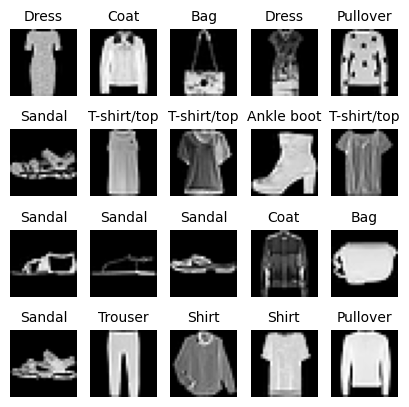

In [28]:
# Displaying some images with their classification
m, n,z = x_train.shape
names = ['T-shirt/top', 'Trouser', 'Pullover',
         'Dress', 'Coat', 'Sandal', 'Shirt',
         'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(4,5, figsize=(5,5))
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Display the image
    ax.imshow(x_train[random_index], cmap='gray')

    # Display the label above the image
    ax.set_title(f"{names[y_train[random_index]]}",fontsize=10)
    ax.set_axis_off()

In [43]:
# Flattening the inputs
x_train_F = tf.keras.layers.Flatten()(x_train)
x_test_F =  tf.keras.layers.Flatten()(x_test)
print(f'training set dimensions: {x_train_F.shape}')
print(f'test set dimensions: {x_test_F.shape}')

training set dimensions: (60000, 784)
test set dimensions: (10000, 784)


In [44]:
# Scaling the features (pixels values)
scaler = StandardScaler()
x_train_scaler = scaler.fit(x_train_F)
x_train_S = x_train_scaler.transform(x_train_F)
x_test_scaler = scaler.fit(x_test_F)
x_test_S = x_test_scaler.transform(x_test_F)

Building and training the neural network

In [36]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

history = model.fit(x_train_S, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7827 - loss: 0.6606 - val_accuracy: 0.8553 - val_loss: 0.3986
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8553 - loss: 0.3940 - val_accuracy: 0.8620 - val_loss: 0.3935
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8726 - loss: 0.3575 - val_accuracy: 0.8613 - val_loss: 0.3989
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8762 - loss: 0.3445 - val_accuracy: 0.8764 - val_loss: 0.3647
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8844 - loss: 0.3192 - val_accuracy: 0.8714 - val_loss: 0.3798
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8885 - loss: 0.3156 - val_accuracy: 0.8843 - val_loss: 0.3418
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8904 - loss: 0.2992 - val_accuracy: 0.8822 - val_loss: 0.3553
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8968 - loss: 0.2805 

Plotting the loss history

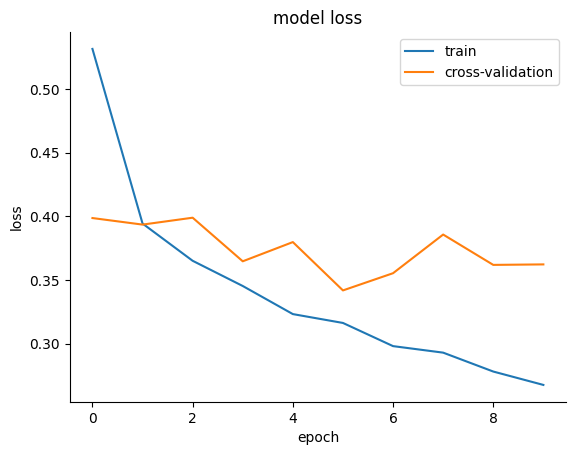

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross-validation'], loc='upper right')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.show()

Evaluating the model

In [38]:
test_loss, test_accuracy = model.evaluate(x_test_S, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3740
Test loss: 0.38513076305389404
Test accuracy: 0.8816999793052673


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


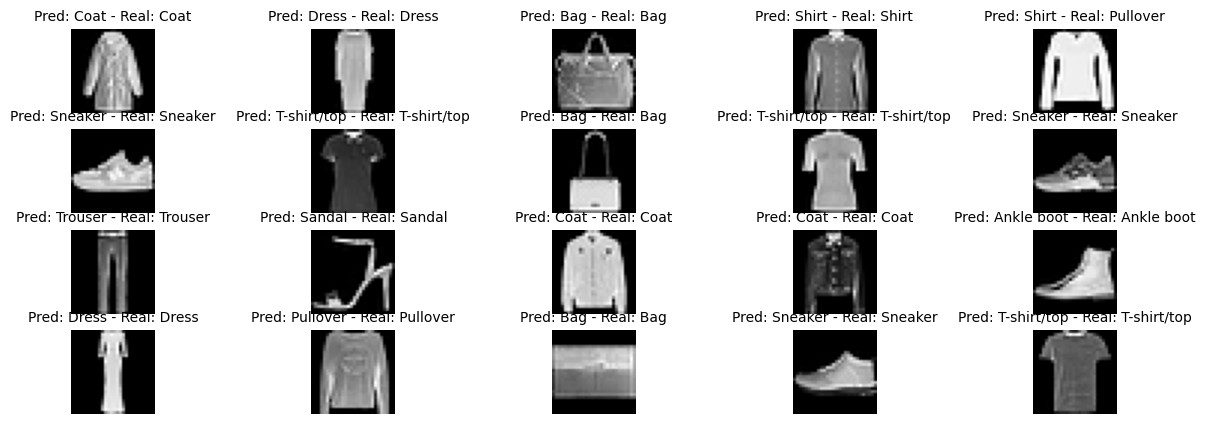

In [52]:
# Displaying some random images with their classification and the predicted class
m, n,z = x_test.shape
fig, axes = plt.subplots(4,5, figsize=(15,5))
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    pred_vector = model.predict(x_test_S[random_index].reshape(1,-1))
    pred_P = tf.nn.softmax(pred_vector)
    # Display the image
    ax.imshow(x_test[random_index], cmap='gray')

    # Display the label above the image
    ax.set_title(f"Pred: {names[np.argmax(pred_P)]} - Real: {names[y_test[random_index]]}",fontsize=10)
    ax.set_axis_off()

Saving the model

In [ ]:
model.save('modelo.h5')